## Linkedin data analysis 

In [ ]:
!pip install pandas matplotlib seaborn TextBlob

### Reading the CSV File

In [20]:
import pandas as pd

# Load the connections data
connections_df = pd.read_csv('Data/Connections.csv')  # Skipping the non-data lines

# Load the messages data
messages_df = pd.read_csv('Data/Messages.csv')

# Convert 'Connected On' and 'DATE' fields to datetime format
connections_df['Connected On'] = pd.to_datetime(connections_df['Connected On'])
messages_df['DATE'] = pd.to_datetime(messages_df['DATE'])

# Check the structure of both datasets


### Cleaning the Data

In [21]:
# Remove rows with missing data (optional, based on what you want to do)
connections_df = connections_df.dropna(subset=['First Name', 'Last Name', 'Company', 'Position'])
messages_df = messages_df.dropna(subset=['CONTENT'])

# Verify that dates are correctly formatted
connections_df['Connected On'] = pd.to_datetime(connections_df['Connected On'], errors='coerce')
messages_df['DATE'] = pd.to_datetime(messages_df['DATE'], errors='coerce')


### Data Filtering and Analysis

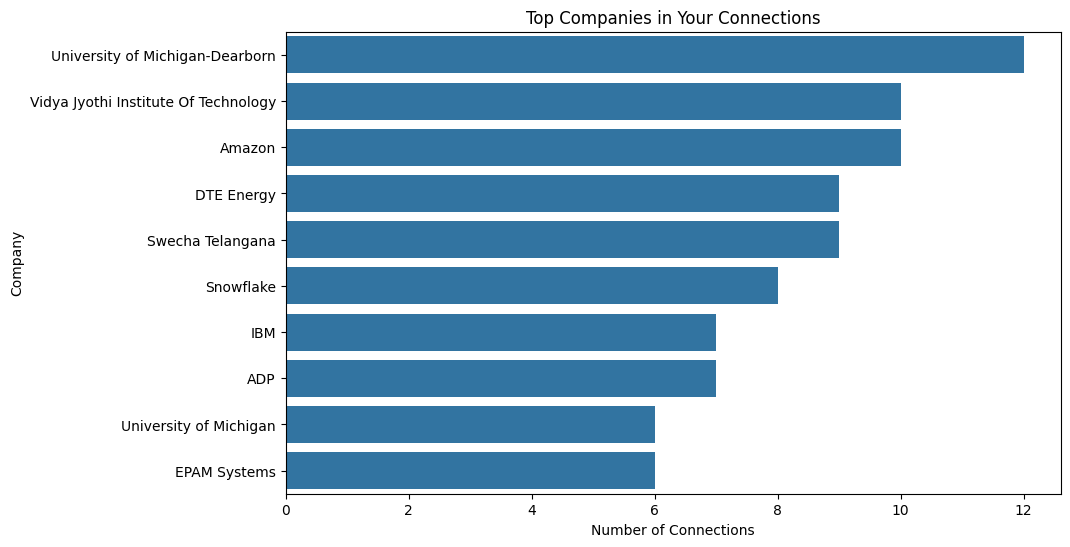

In [22]:
# Count the top companies where your connections work
top_companies = connections_df['Company'].value_counts().head(10)

# Plot the top companies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top Companies in Your Connections")
plt.xlabel("Number of Connections")
plt.ylabel("Company")
plt.show()


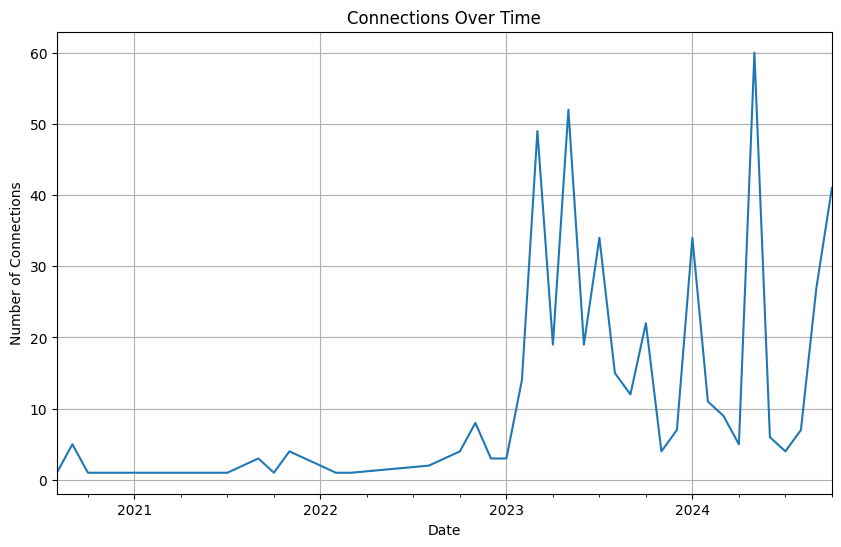

In [23]:
# Group by the month and year of connection
connections_over_time = connections_df.groupby(connections_df['Connected On'].dt.to_period('M')).size()

# Plot connections over time
plt.figure(figsize=(10,6))
connections_over_time.plot(kind='line')
plt.title("Connections Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Connections")
plt.grid(True)
plt.show()


/var/folders/gs/zm5w9dsn07gbl4vbjkj2m9qw0000gn/T/ipykernel_42392/1617560111.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  messages_over_time = messages_df.groupby(messages_df['DATE'].dt.to_period('M')).size()


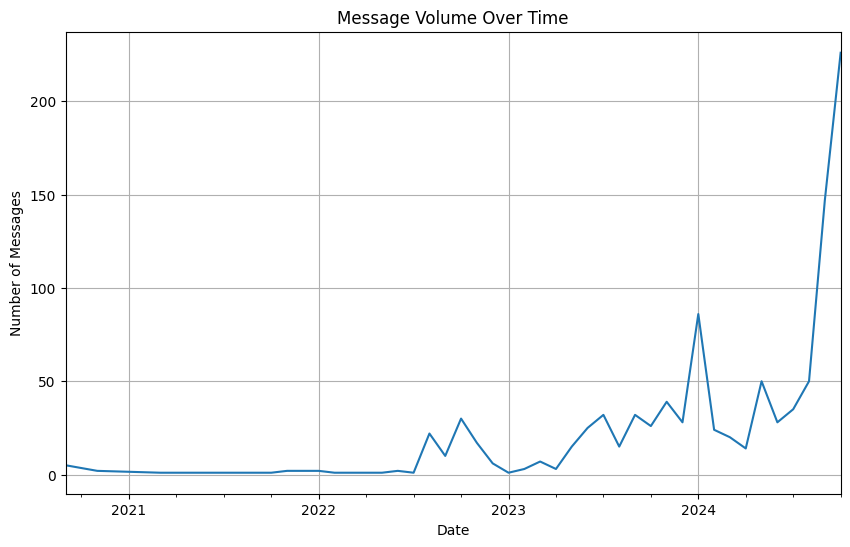

In [24]:
# Group messages by month
messages_over_time = messages_df.groupby(messages_df['DATE'].dt.to_period('M')).size()

# Plot message volume over time
plt.figure(figsize=(10,6))
messages_over_time.plot(kind='line')
plt.title("Message Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.show()


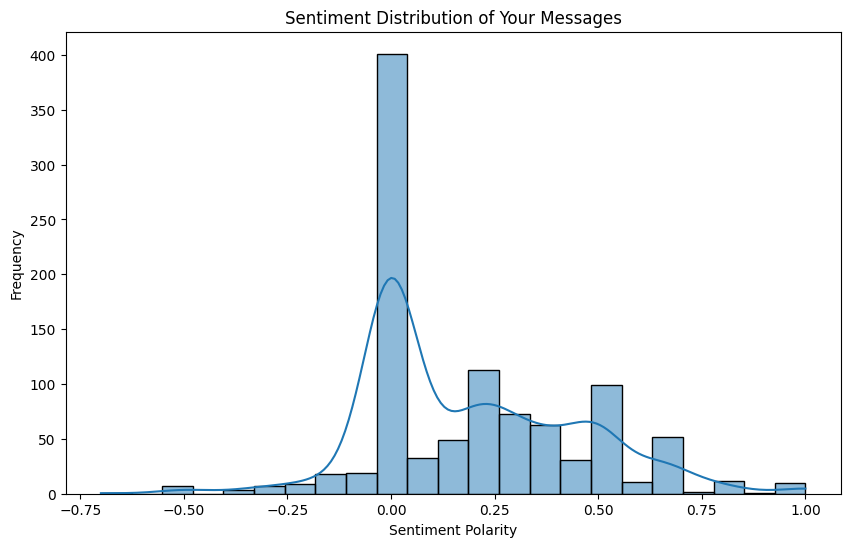

In [28]:
from textblob import TextBlob

# Apply sentiment analysis on message content
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

messages_df['Sentiment'] = messages_df['CONTENT'].apply(get_sentiment)

# Plot the distribution of sentiments
plt.figure(figsize=(10,6))
sns.histplot(messages_df['Sentiment'], kde=True)
plt.title("Sentiment Distribution of Your Messages")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


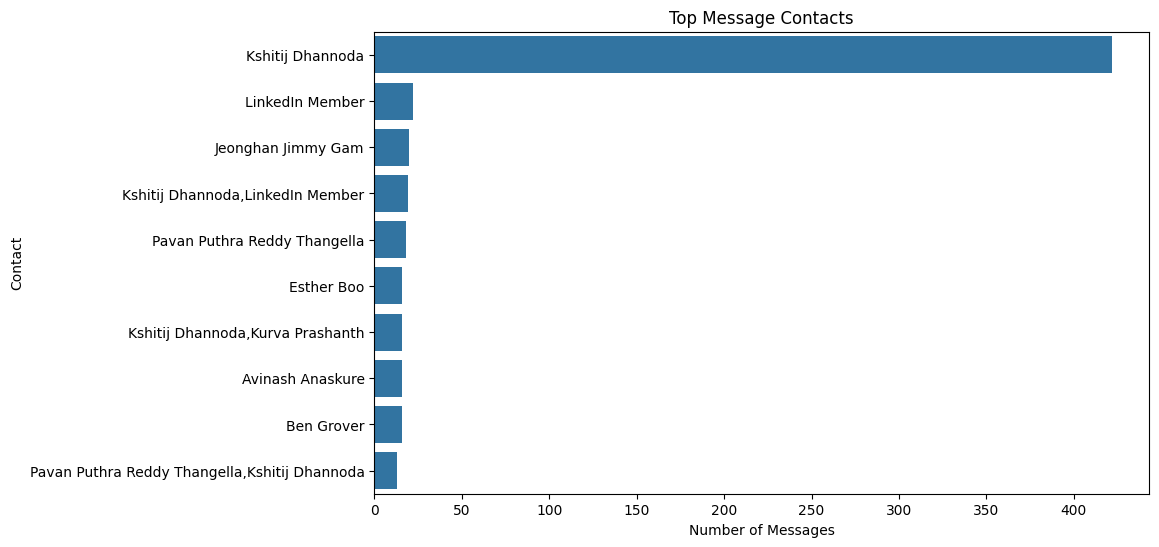

In [29]:
# Count the number of messages per recipient
top_contacts = messages_df['TO'].value_counts().head(10)

# Plot the most frequent contacts
plt.figure(figsize=(10,6))
sns.barplot(x=top_contacts.values, y=top_contacts.index)
plt.title("Top Message Contacts")
plt.xlabel("Number of Messages")
plt.ylabel("Contact")
plt.show()
